__Извлечение структурированных данных из текста__

Евгений Борисов <esborisov@sevsu.ru>

синтаксический парсер Yargy пакета Natasha

---

Александр Кукушкин   
Yargy-парсер и библиотека Natasha. Извлечения структурированной информации из текстов на русском языке.     
https://habr.com/ru/post/349864/
    

Александр Кукушкин   
Yargy парсер. Извлечение структурированной информации из текстов на русском языке.     
PyData Moscow 2018   
https://www.youtube.com/watch?v=NQxzx0qYgK8

https://telegram.me/natural_language_processing

---

In [1]:
lines = [
 '1 пучок петрушки',
 '● Молоко или вода - 2 стакана',
 '20 г миндаль ',
 'Яйцо - 1 шт.',
 '400 г варёного сгущённого молока',
 '3 ст.л. красного винного уксуса ',
 '🔹 Картофель - 600-700 г',
 '- 700 гр свинины',
 'Вода - 0,5 л',
 '● Куриная грудка - 1 шт.',
 'Лимонный сок - 2 ст. л',
 'Сыворотка - 1 ч. л.',
 'Сыр - 100 г ',
 '- мука 2 стакана ',
 '● 3 ст. л. сливок',
 '200 гр фарша',
 '- мука - 120 гр,',
 'Лимонный сок - 20г. ',
 'Корень имбиря маринованный 7 г ',
 'соль - 1/2 ч. ложки ',
 '400 г однородного творога;',
 '🔹 5 средних варёных картофелин',
 'Сахар - 0,5 стак.',
 '-150 г сахара',
 'Говядина 500 г ',
 'Кунжут 1 ст. л. ',
 'Йогурт натуральный - 2 ст. л',
 'Лук - 100 г ',
 'Оливковое масло 3 ст.л.; ',
 '-яблоки 6-8 штук среднего размера',
 '- какао 100 г ',
 '●1 ч. л. ванильной эссенции,',
 'Какао-порошок - 50 гр., ',
 '● соль (1/2 ч. ложки).',
 'Уксус(6%)-2ст л',
 '2 ст. л. лимонного сока',
 '• уксус, 60-70 мл (яблочный) ',
 '● 300-400гр .куриной печени, ',
 ' 100 мл коньяка,',
 'говядина - 350 Грамм (для фарша) ',
 'Яйца - 3 шт.',
 '• Сыр - 100 г (у нас российский) ',
 'Лук зеленый 5 стебелей ',
 '- сливочное масло - 90 гр,',
 '● Колбаса копч. - 100 гр.',
 '1-2 ч. л. натёртого имбиря',
 '- морковь 1шт,',
 '-Фасоль красная в собственном соку - 200 г',
 'Лук репчатый - 3 шт.',
 '-100 грамм кефира (либо 2-3 ложки майонеза) ',
 ' Соль >20 г;',
 '● вода - 1/2 стакана',
 'яйца - 3 шт. ',
 '~1,2 кг. куриного фарша ',
 '●200г муки',
 'Молоко - 1 ст. л. ',
 '2 яйца',
 '2 банана',
 '● яйца - 2 шт,',
 'Лаваш прямоугоьный - 1 Штука',
 'Лёд - 2 стакана,',
 'Выход: 20 г.',
 '- Яйцо куриное 5 шт.',
 '-Ветчина 150 гр ',
 'творог 200 гр',
 'сахар ванильный - 1 пакетик ',
 ' Сода - 1 ч.ложка,',
 '● 80-100 г сливочного маслица',
 '500 г куриного филе',
 '100 г сливок 35% жирности (брал 20%) ',
 '- сахар 1 стакан ',
 '● Яйцо - 1 шт.',
 'Рубленные грецкие орехи - 50 г ',
 '● Помидоры спелые - 2 кг',
 '● Масло растительное рафинированное - 50 г',
 '• курица (филе) 500 г',
 '● 150 г копченой колбасы; ',
 '-1 кг. - сахара,',
 'Болгарский перец - 3 шт.',
 'Крахмал - 2 столовые ложки',
 'Сухари (молотые) - 3-4 ст. л.',
 '● Кофе с сахаром - 1 стакан',
 'масло растительное - 1 гр.',
 '● Нежирная свинина, 300-400г, ',
 '🔹 100 г тертого сыра',
 'Яйца - 2 шт',
 '● Картофельная мука - 1 стакан',
 'Подсолнечное масло - 50 мл',
 '75 г сливочного масла ',
 '● 500 гр. печенья ',
 '🔹 2 яйца',
 '● 200г крабовых палочек ',
 '● картошка - 0,5 кг.',
 '● 120 г сметаны (15-20%)',
 '1 кабачок (400 гр)',
 '-кефир - 1,5 стакана;',
 ' Масло растительное 1 ст.л.;',
 '● 150 г. муки ',
 '-0,5 ч. л. соды;',
 'Томатная паста - 2 ст. ложки',
]

---

In [2]:
from ipymarkup import show_span_box_markup as show_markup

from yargy import Parser
from yargy import rule
from yargy import or_
from yargy.predicates import eq
from yargy.predicates import in_
from yargy.predicates import type as type_
# from yargy.predicates import normalized
from yargy.predicates import gram
from yargy.pipelines import morph_pipeline
from yargy.interpretation import fact

In [3]:
Measure = fact(
    'Measure',
    ['amount','unit'],
)
Product = fact(
    'Product',
    ['name','modifiers'],
)
Ingradient = fact(
    'Ingradient',
    ['measure','product'],
)

In [4]:
INT = type_('INT')

DIGIT = rule(INT).interpretation(Measure.amount.custom(int))

FLOAT = rule(
    INT,
    in_(',.'),
    INT
).interpretation(Measure.amount.custom(lambda _: float(_.replace(',','.'))))


from fractions import Fraction

def parse_fraction(value):
    a,b = value.split('/')
    return Fraction( int(a),int(b) )

FRACTION = rule(
    INT,
    eq('/'),
    INT
).interpretation(Measure.amount.custom(parse_fraction))
 
def parse_range(value):
    a,b = value.split('-')
    return (int(a),int(b))

RANGE = rule(
    INT,
    eq('-'),
    INT
).interpretation(Measure.amount.custom(parse_range))


AMOUNT = or_(
    DIGIT,
    FLOAT,
    FRACTION,
    RANGE,
)

UNIT_NAME = morph_pipeline([
    'г',
    'гр',
    'грaмм',
    'кг',
    'чаш',
    'шт',
    'л',
    'литр',
    'мл',
    'миллилитр',    
    'ст.л',
    'ст.ложка',
    'ч.ложка',
    'ч.л',
    'чайная ложка',
    'стакан', 
    'cт',
    'перо',
    'пучок',
    'горсть',
]).interpretation(Measure.unit.normalized())

UNIT = rule(
    UNIT_NAME,
    in_('.;').optional(),
)


MEASURE = rule( 
    AMOUNT, 
    UNIT.optional(), 
).interpretation(Measure)

# грамемы
# ADJF - прилагательное
# NOUN - существительное

ADJF = gram('ADJF')
NOUN = gram('NOUN')

MODIFIER = ADJF.repeatable().interpretation(Product.modifiers.normalized())
PRODUCT = rule(
    MODIFIER.optional(),
    NOUN.interpretation(Product.name.normalized()),
    MODIFIER.optional(),
).interpretation(Product)

SEP = in_('-:,')

INGRADIENT = or_(
    rule(
        PRODUCT.interpretation(Ingradient.product),
        SEP.optional(),
        MEASURE.interpretation(Ingradient.measure),
    ),
    rule(
        MEASURE.interpretation(Ingradient.measure),
        SEP.optional(),
        PRODUCT.interpretation(Ingradient.product),
    ),
).interpretation(Ingradient)

In [5]:
# INGRADIENT.normalized.as_bnf

In [6]:
parser = Parser(INGRADIENT)

__________________________________________________________________________________________


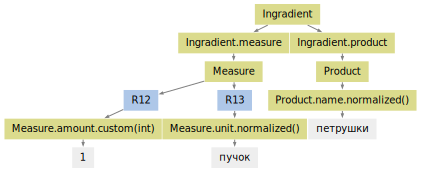

Ingradient(
    measure=Measure(
        amount=1,
        unit='пучок'
    ),
    product=Product(
        name='петрушка',
        modifiers=None
    )
)

__________________________________________________________________________________________


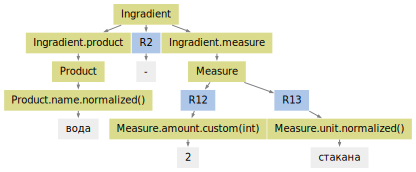

Ingradient(
    measure=Measure(
        amount=2,
        unit='стакан'
    ),
    product=Product(
        name='вода',
        modifiers=None
    )
)

__________________________________________________________________________________________


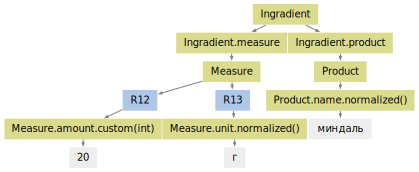

Ingradient(
    measure=Measure(
        amount=20,
        unit='г'
    ),
    product=Product(
        name='миндаль',
        modifiers=None
    )
)

__________________________________________________________________________________________


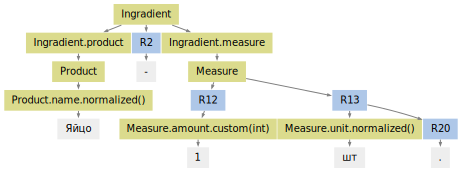

Ingradient(
    measure=Measure(
        amount=1,
        unit='шт'
    ),
    product=Product(
        name='яйцо',
        modifiers=None
    )
)

__________________________________________________________________________________________


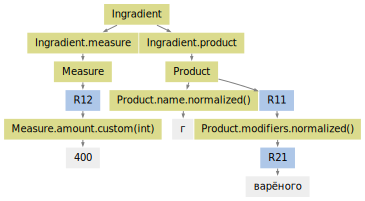

Ingradient(
    measure=Measure(
        amount=400,
        unit=None
    ),
    product=Product(
        name='г',
        modifiers='варёный'
    )
)

__________________________________________________________________________________________


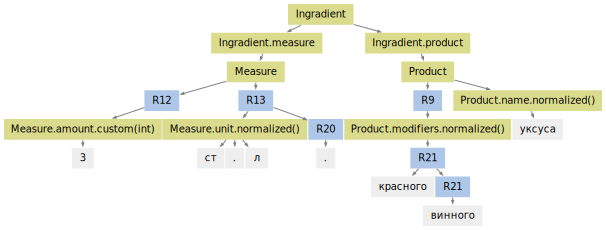

Ingradient(
    measure=Measure(
        amount=3,
        unit='ст.л'
    ),
    product=Product(
        name='уксус',
        modifiers='красный винный'
    )
)

__________________________________________________________________________________________


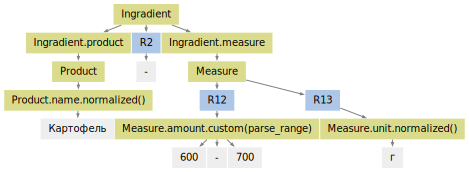

Ingradient(
    measure=Measure(
        amount=(600,
         700),
        unit='г'
    ),
    product=Product(
        name='картофель',
        modifiers=None
    )
)

__________________________________________________________________________________________


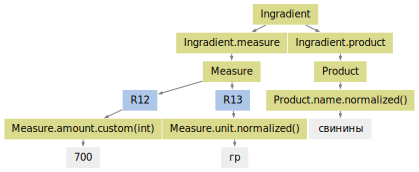

Ingradient(
    measure=Measure(
        amount=700,
        unit='гр'
    ),
    product=Product(
        name='свинин',
        modifiers=None
    )
)

__________________________________________________________________________________________


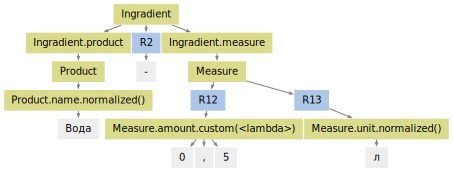

Ingradient(
    measure=Measure(
        amount=0.5,
        unit='л'
    ),
    product=Product(
        name='вода',
        modifiers=None
    )
)

__________________________________________________________________________________________


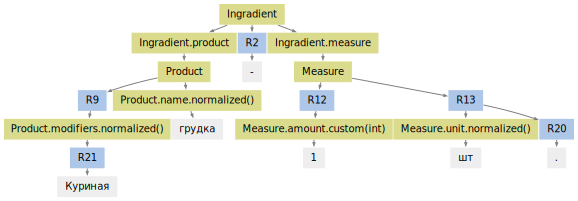

Ingradient(
    measure=Measure(
        amount=1,
        unit='шт'
    ),
    product=Product(
        name='грудка',
        modifiers='куриный'
    )
)

__________________________________________________________________________________________


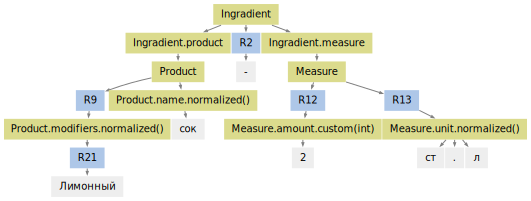

Ingradient(
    measure=Measure(
        amount=2,
        unit='ст.л'
    ),
    product=Product(
        name='сок',
        modifiers='лимонный'
    )
)

__________________________________________________________________________________________


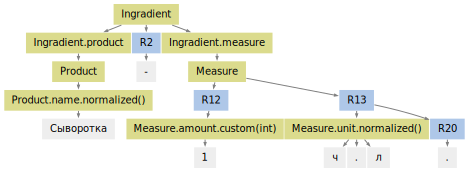

Ingradient(
    measure=Measure(
        amount=1,
        unit='ч.л'
    ),
    product=Product(
        name='сыворотка',
        modifiers=None
    )
)

__________________________________________________________________________________________


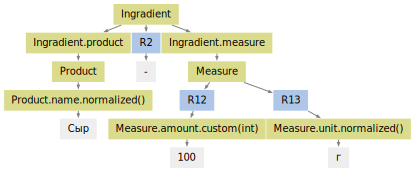

Ingradient(
    measure=Measure(
        amount=100,
        unit='г'
    ),
    product=Product(
        name='сыр',
        modifiers=None
    )
)

__________________________________________________________________________________________


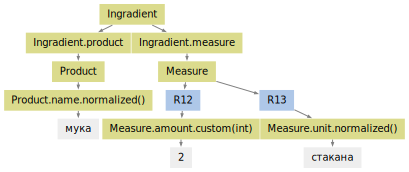

Ingradient(
    measure=Measure(
        amount=2,
        unit='стакан'
    ),
    product=Product(
        name='мука',
        modifiers=None
    )
)

__________________________________________________________________________________________


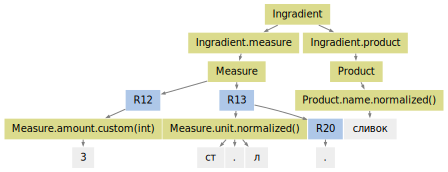

Ingradient(
    measure=Measure(
        amount=3,
        unit='ст.л'
    ),
    product=Product(
        name='сливка',
        modifiers=None
    )
)

__________________________________________________________________________________________


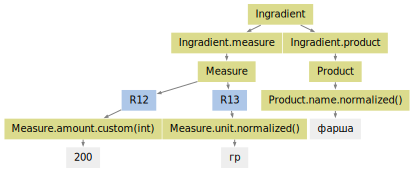

Ingradient(
    measure=Measure(
        amount=200,
        unit='гр'
    ),
    product=Product(
        name='фарш',
        modifiers=None
    )
)

__________________________________________________________________________________________


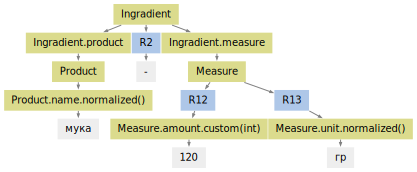

Ingradient(
    measure=Measure(
        amount=120,
        unit='гр'
    ),
    product=Product(
        name='мука',
        modifiers=None
    )
)

__________________________________________________________________________________________


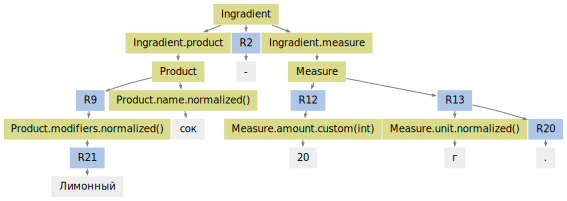

Ingradient(
    measure=Measure(
        amount=20,
        unit='г'
    ),
    product=Product(
        name='сок',
        modifiers='лимонный'
    )
)

__________________________________________________________________________________________


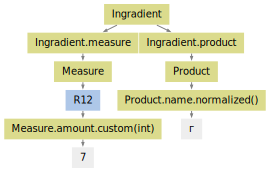

Ingradient(
    measure=Measure(
        amount=7,
        unit=None
    ),
    product=Product(
        name='г',
        modifiers=None
    )
)

__________________________________________________________________________________________


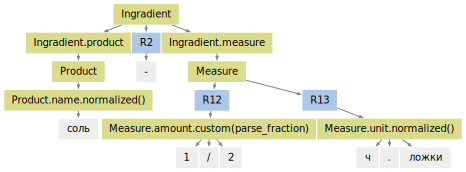

Ingradient(
    measure=Measure(
        amount=Fraction(1, 2),
        unit='ч.ложка'
    ),
    product=Product(
        name='соль',
        modifiers=None
    )
)

__________________________________________________________________________________________


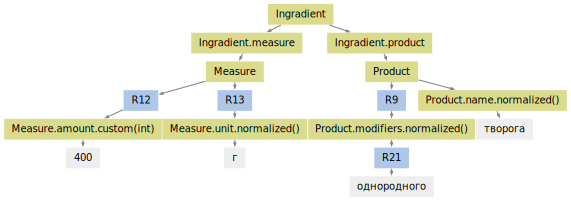

Ingradient(
    measure=Measure(
        amount=400,
        unit='г'
    ),
    product=Product(
        name='творог',
        modifiers='однородный'
    )
)

__________________________________________________________________________________________


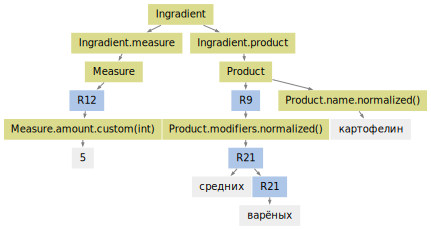

Ingradient(
    measure=Measure(
        amount=5,
        unit=None
    ),
    product=Product(
        name='картофелина',
        modifiers='средний варёный'
    )
)

__________________________________________________________________________________________


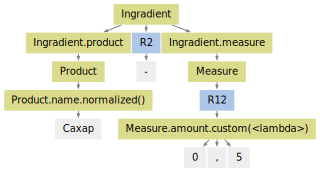

Ingradient(
    measure=Measure(
        amount=0.5,
        unit=None
    ),
    product=Product(
        name='сахар',
        modifiers=None
    )
)

__________________________________________________________________________________________


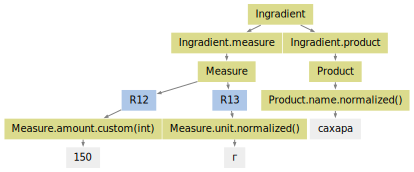

Ingradient(
    measure=Measure(
        amount=150,
        unit='г'
    ),
    product=Product(
        name='сахар',
        modifiers=None
    )
)

__________________________________________________________________________________________


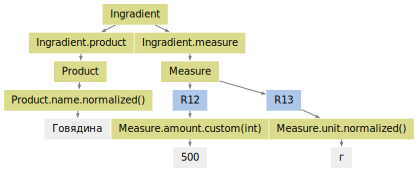

Ingradient(
    measure=Measure(
        amount=500,
        unit='г'
    ),
    product=Product(
        name='говядина',
        modifiers=None
    )
)

__________________________________________________________________________________________


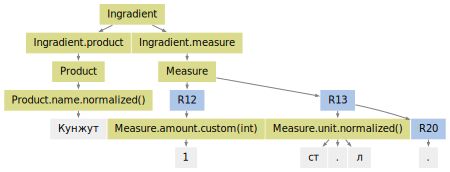

Ingradient(
    measure=Measure(
        amount=1,
        unit='ст.л'
    ),
    product=Product(
        name='кунжут',
        modifiers=None
    )
)

__________________________________________________________________________________________


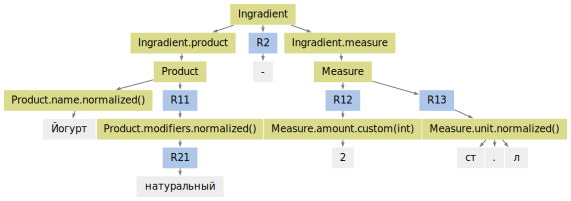

Ingradient(
    measure=Measure(
        amount=2,
        unit='ст.л'
    ),
    product=Product(
        name='йогурт',
        modifiers='натуральный'
    )
)

__________________________________________________________________________________________


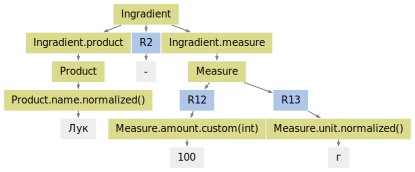

Ingradient(
    measure=Measure(
        amount=100,
        unit='г'
    ),
    product=Product(
        name='лук',
        modifiers=None
    )
)

__________________________________________________________________________________________


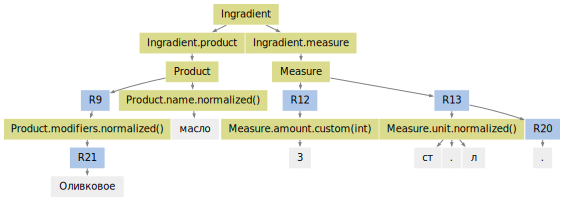

Ingradient(
    measure=Measure(
        amount=3,
        unit='ст.л'
    ),
    product=Product(
        name='масло',
        modifiers='оливковый'
    )
)

__________________________________________________________________________________________


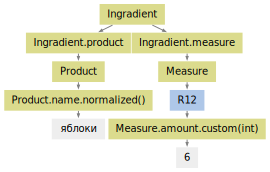

Ingradient(
    measure=Measure(
        amount=6,
        unit=None
    ),
    product=Product(
        name='яблоко',
        modifiers=None
    )
)

__________________________________________________________________________________________


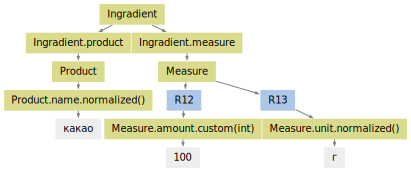

Ingradient(
    measure=Measure(
        amount=100,
        unit='г'
    ),
    product=Product(
        name='какао',
        modifiers=None
    )
)

__________________________________________________________________________________________


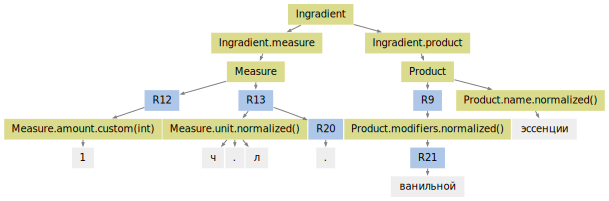

Ingradient(
    measure=Measure(
        amount=1,
        unit='ч.л'
    ),
    product=Product(
        name='эссенция',
        modifiers='ванильный'
    )
)

__________________________________________________________________________________________


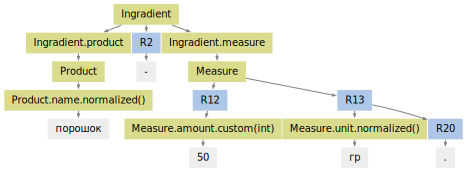

Ingradient(
    measure=Measure(
        amount=50,
        unit='гр'
    ),
    product=Product(
        name='порошок',
        modifiers=None
    )
)

__________________________________________________________________________________________


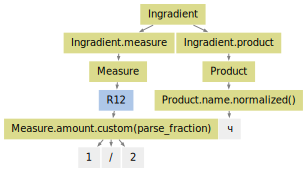

Ingradient(
    measure=Measure(
        amount=Fraction(1, 2),
        unit=None
    ),
    product=Product(
        name='ч',
        modifiers=None
    )
)

__________________________________________________________________________________________


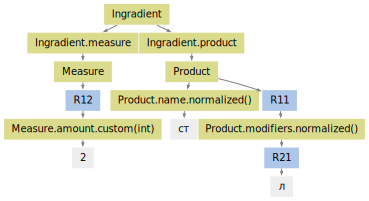

Ingradient(
    measure=Measure(
        amount=2,
        unit=None
    ),
    product=Product(
        name='ст',
        modifiers='л'
    )
)

__________________________________________________________________________________________


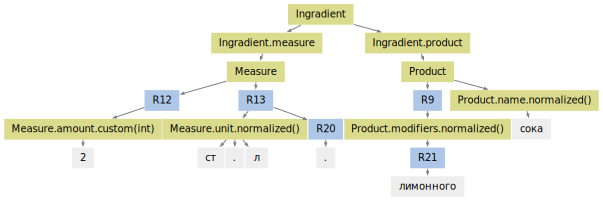

Ingradient(
    measure=Measure(
        amount=2,
        unit='ст.л'
    ),
    product=Product(
        name='сок',
        modifiers='лимонный'
    )
)

__________________________________________________________________________________________


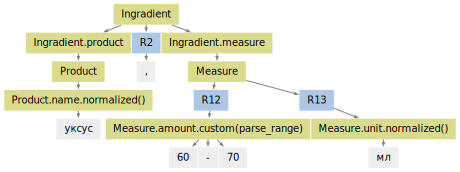

Ingradient(
    measure=Measure(
        amount=(60,
         70),
        unit='мл'
    ),
    product=Product(
        name='уксус',
        modifiers=None
    )
)

__________________________________________________________________________________________


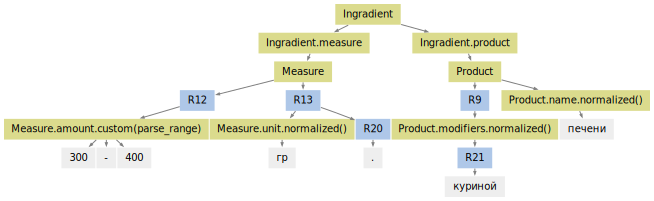

Ingradient(
    measure=Measure(
        amount=(300,
         400),
        unit='гр'
    ),
    product=Product(
        name='печень',
        modifiers='куриный'
    )
)

__________________________________________________________________________________________


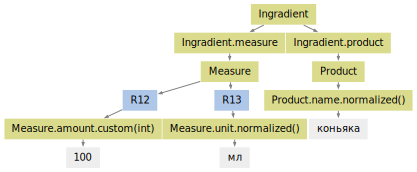

Ingradient(
    measure=Measure(
        amount=100,
        unit='мл'
    ),
    product=Product(
        name='коньяк',
        modifiers=None
    )
)

__________________________________________________________________________________________


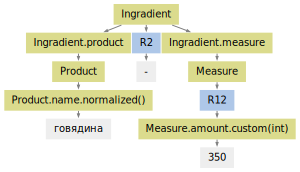

Ingradient(
    measure=Measure(
        amount=350,
        unit=None
    ),
    product=Product(
        name='говядина',
        modifiers=None
    )
)

__________________________________________________________________________________________


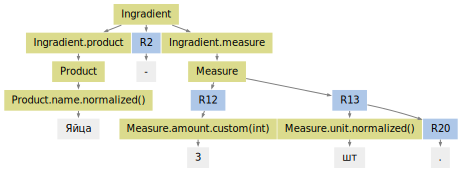

Ingradient(
    measure=Measure(
        amount=3,
        unit='шт'
    ),
    product=Product(
        name='яйцо',
        modifiers=None
    )
)

__________________________________________________________________________________________


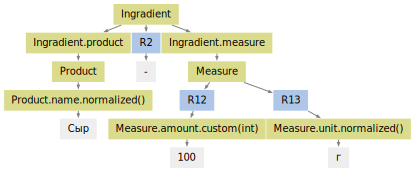

Ingradient(
    measure=Measure(
        amount=100,
        unit='г'
    ),
    product=Product(
        name='сыр',
        modifiers=None
    )
)

__________________________________________________________________________________________


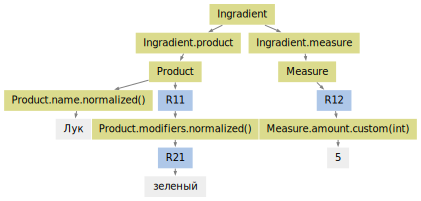

Ingradient(
    measure=Measure(
        amount=5,
        unit=None
    ),
    product=Product(
        name='лук',
        modifiers='зелёный'
    )
)

__________________________________________________________________________________________


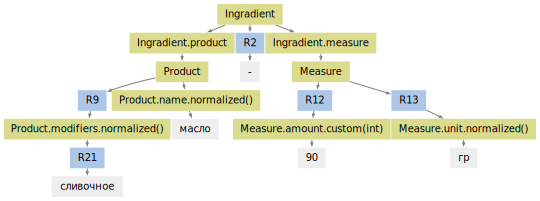

Ingradient(
    measure=Measure(
        amount=90,
        unit='гр'
    ),
    product=Product(
        name='масло',
        modifiers='сливочный'
    )
)

__________________________________________________________________________________________


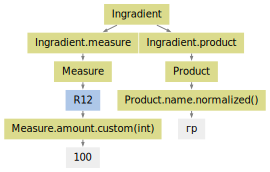

Ingradient(
    measure=Measure(
        amount=100,
        unit=None
    ),
    product=Product(
        name='гр',
        modifiers=None
    )
)

__________________________________________________________________________________________


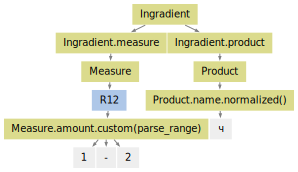

Ingradient(
    measure=Measure(
        amount=(1,
         2),
        unit=None
    ),
    product=Product(
        name='ч',
        modifiers=None
    )
)

__________________________________________________________________________________________


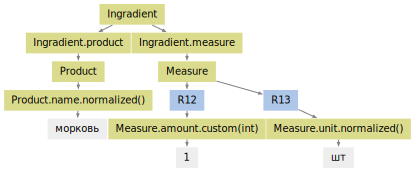

Ingradient(
    measure=Measure(
        amount=1,
        unit='шт'
    ),
    product=Product(
        name='морковь',
        modifiers=None
    )
)

__________________________________________________________________________________________


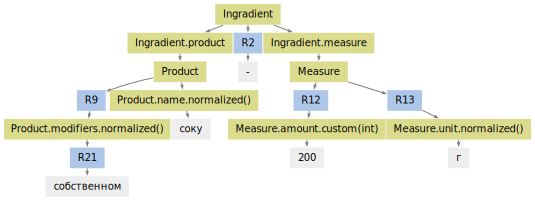

Ingradient(
    measure=Measure(
        amount=200,
        unit='г'
    ),
    product=Product(
        name='сок',
        modifiers='собственный'
    )
)

__________________________________________________________________________________________


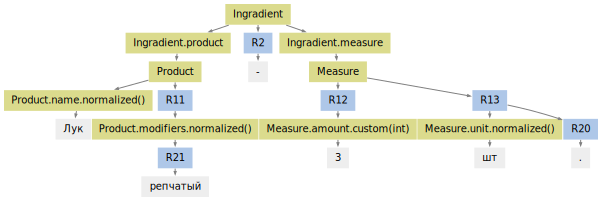

Ingradient(
    measure=Measure(
        amount=3,
        unit='шт'
    ),
    product=Product(
        name='лук',
        modifiers='репчатый'
    )
)

__________________________________________________________________________________________


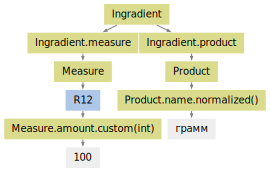

Ingradient(
    measure=Measure(
        amount=100,
        unit=None
    ),
    product=Product(
        name='грамм',
        modifiers=None
    )
)

__________________________________________________________________________________________


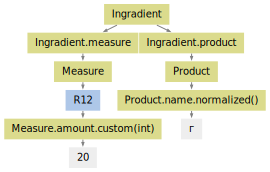

Ingradient(
    measure=Measure(
        amount=20,
        unit=None
    ),
    product=Product(
        name='г',
        modifiers=None
    )
)

__________________________________________________________________________________________


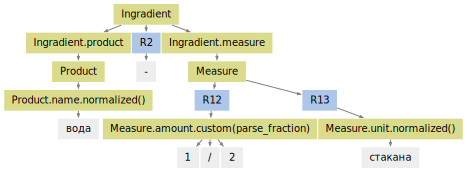

Ingradient(
    measure=Measure(
        amount=Fraction(1, 2),
        unit='стакан'
    ),
    product=Product(
        name='вода',
        modifiers=None
    )
)

__________________________________________________________________________________________


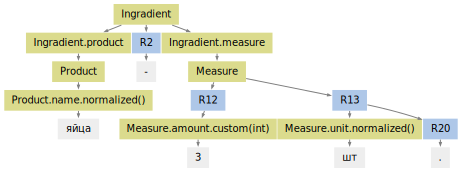

Ingradient(
    measure=Measure(
        amount=3,
        unit='шт'
    ),
    product=Product(
        name='яйцо',
        modifiers=None
    )
)

__________________________________________________________________________________________


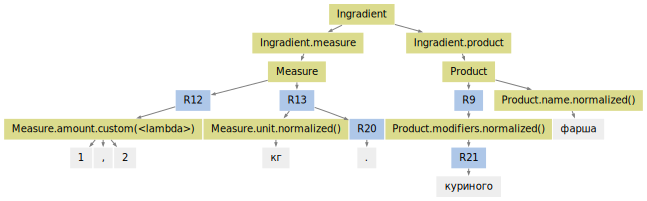

Ingradient(
    measure=Measure(
        amount=1.2,
        unit='кг'
    ),
    product=Product(
        name='фарш',
        modifiers='куриный'
    )
)

__________________________________________________________________________________________


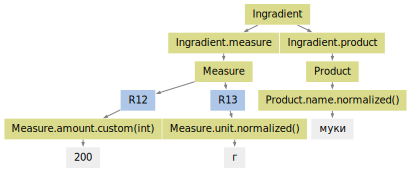

Ingradient(
    measure=Measure(
        amount=200,
        unit='г'
    ),
    product=Product(
        name='мука',
        modifiers=None
    )
)

__________________________________________________________________________________________


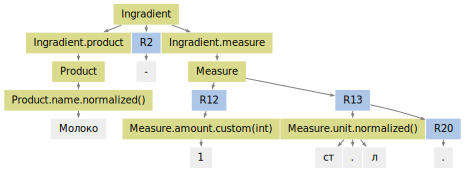

Ingradient(
    measure=Measure(
        amount=1,
        unit='ст.л'
    ),
    product=Product(
        name='молоко',
        modifiers=None
    )
)

__________________________________________________________________________________________


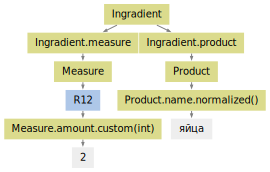

Ingradient(
    measure=Measure(
        amount=2,
        unit=None
    ),
    product=Product(
        name='яйцо',
        modifiers=None
    )
)

__________________________________________________________________________________________


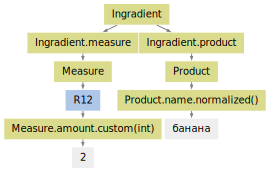

Ingradient(
    measure=Measure(
        amount=2,
        unit=None
    ),
    product=Product(
        name='банан',
        modifiers=None
    )
)

__________________________________________________________________________________________


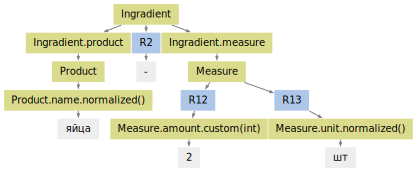

Ingradient(
    measure=Measure(
        amount=2,
        unit='шт'
    ),
    product=Product(
        name='яйцо',
        modifiers=None
    )
)

__________________________________________________________________________________________


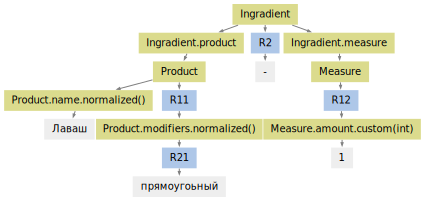

Ingradient(
    measure=Measure(
        amount=1,
        unit=None
    ),
    product=Product(
        name='лаваш',
        modifiers='прямоугоьный'
    )
)

__________________________________________________________________________________________


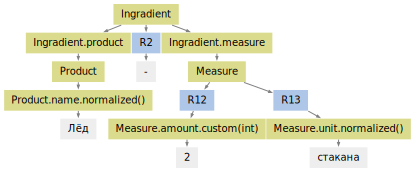

Ingradient(
    measure=Measure(
        amount=2,
        unit='стакан'
    ),
    product=Product(
        name='лёд',
        modifiers=None
    )
)

__________________________________________________________________________________________


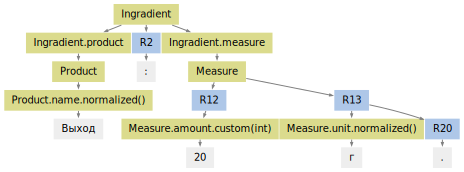

Ingradient(
    measure=Measure(
        amount=20,
        unit='г'
    ),
    product=Product(
        name='выход',
        modifiers=None
    )
)

__________________________________________________________________________________________


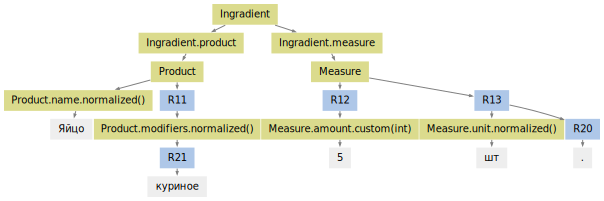

Ingradient(
    measure=Measure(
        amount=5,
        unit='шт'
    ),
    product=Product(
        name='яйцо',
        modifiers='куриный'
    )
)

__________________________________________________________________________________________


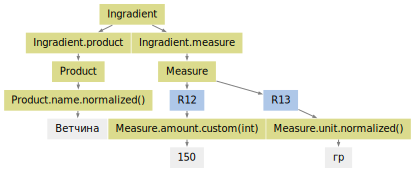

Ingradient(
    measure=Measure(
        amount=150,
        unit='гр'
    ),
    product=Product(
        name='ветчина',
        modifiers=None
    )
)

__________________________________________________________________________________________


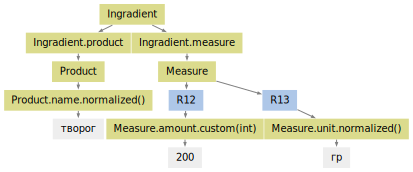

Ingradient(
    measure=Measure(
        amount=200,
        unit='гр'
    ),
    product=Product(
        name='творог',
        modifiers=None
    )
)

__________________________________________________________________________________________


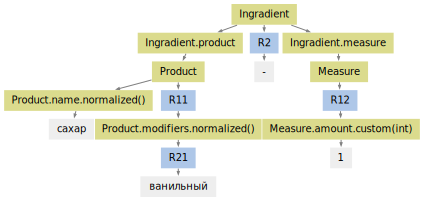

Ingradient(
    measure=Measure(
        amount=1,
        unit=None
    ),
    product=Product(
        name='сахар',
        modifiers='ванильный'
    )
)

__________________________________________________________________________________________


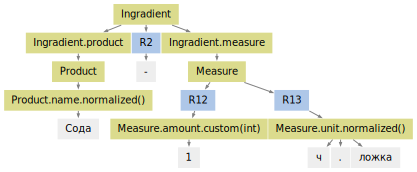

Ingradient(
    measure=Measure(
        amount=1,
        unit='ч.ложка'
    ),
    product=Product(
        name='сода',
        modifiers=None
    )
)

__________________________________________________________________________________________


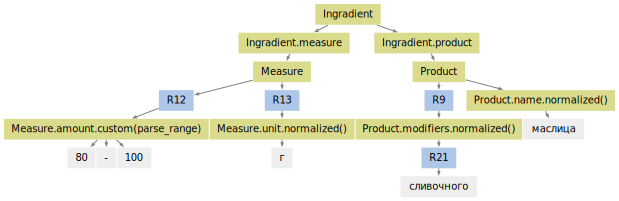

Ingradient(
    measure=Measure(
        amount=(80,
         100),
        unit='г'
    ),
    product=Product(
        name='маслице',
        modifiers='сливочный'
    )
)

__________________________________________________________________________________________


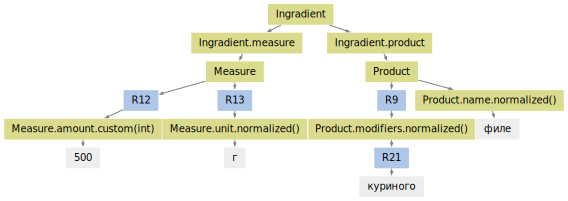

Ingradient(
    measure=Measure(
        amount=500,
        unit='г'
    ),
    product=Product(
        name='филе',
        modifiers='куриный'
    )
)

__________________________________________________________________________________________


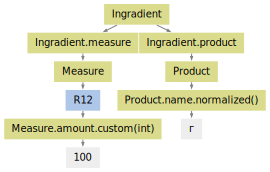

Ingradient(
    measure=Measure(
        amount=100,
        unit=None
    ),
    product=Product(
        name='г',
        modifiers=None
    )
)

__________________________________________________________________________________________


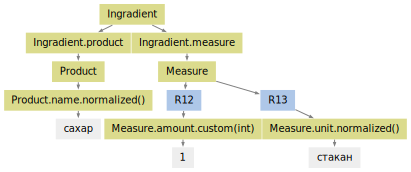

Ingradient(
    measure=Measure(
        amount=1,
        unit='стакан'
    ),
    product=Product(
        name='сахар',
        modifiers=None
    )
)

__________________________________________________________________________________________


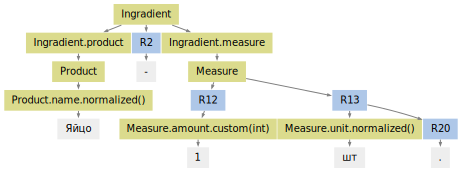

Ingradient(
    measure=Measure(
        amount=1,
        unit='шт'
    ),
    product=Product(
        name='яйцо',
        modifiers=None
    )
)

__________________________________________________________________________________________


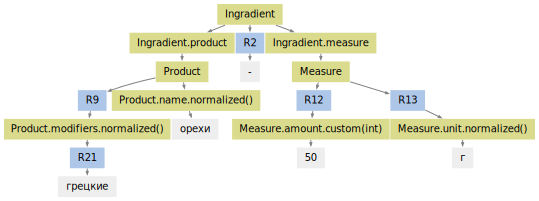

Ingradient(
    measure=Measure(
        amount=50,
        unit='г'
    ),
    product=Product(
        name='орех',
        modifiers='грецкий'
    )
)

__________________________________________________________________________________________


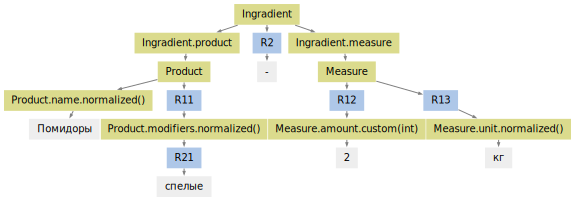

Ingradient(
    measure=Measure(
        amount=2,
        unit='кг'
    ),
    product=Product(
        name='помидор',
        modifiers='спелый'
    )
)

__________________________________________________________________________________________


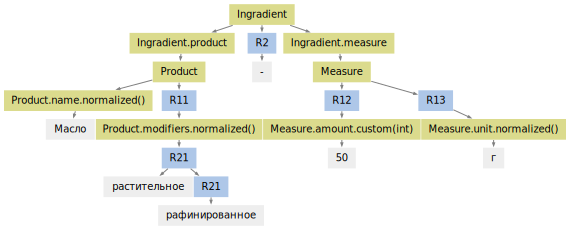

Ingradient(
    measure=Measure(
        amount=50,
        unit='г'
    ),
    product=Product(
        name='масло',
        modifiers='растительный рафинированный'
    )
)

__________________________________________________________________________________________


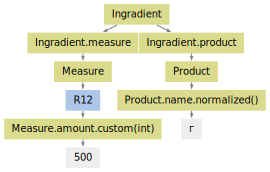

Ingradient(
    measure=Measure(
        amount=500,
        unit=None
    ),
    product=Product(
        name='г',
        modifiers=None
    )
)

__________________________________________________________________________________________


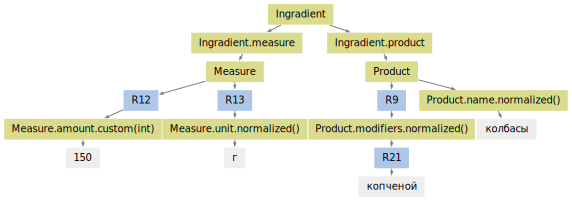

Ingradient(
    measure=Measure(
        amount=150,
        unit='г'
    ),
    product=Product(
        name='колбаса',
        modifiers='копчёный'
    )
)

__________________________________________________________________________________________


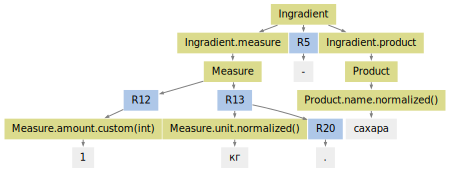

Ingradient(
    measure=Measure(
        amount=1,
        unit='кг'
    ),
    product=Product(
        name='сахар',
        modifiers=None
    )
)

__________________________________________________________________________________________


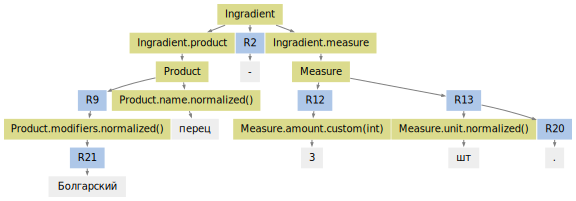

Ingradient(
    measure=Measure(
        amount=3,
        unit='шт'
    ),
    product=Product(
        name='перец',
        modifiers='болгарский'
    )
)

__________________________________________________________________________________________


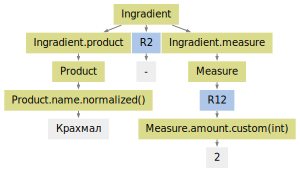

Ingradient(
    measure=Measure(
        amount=2,
        unit=None
    ),
    product=Product(
        name='крахмал',
        modifiers=None
    )
)

__________________________________________________________________________________________


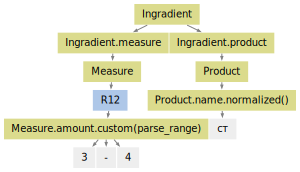

Ingradient(
    measure=Measure(
        amount=(3,
         4),
        unit=None
    ),
    product=Product(
        name='ст',
        modifiers=None
    )
)

__________________________________________________________________________________________


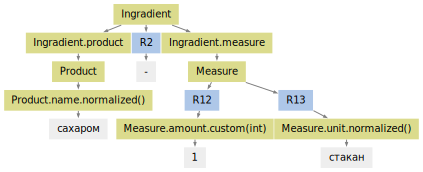

Ingradient(
    measure=Measure(
        amount=1,
        unit='стакан'
    ),
    product=Product(
        name='сахар',
        modifiers=None
    )
)

__________________________________________________________________________________________


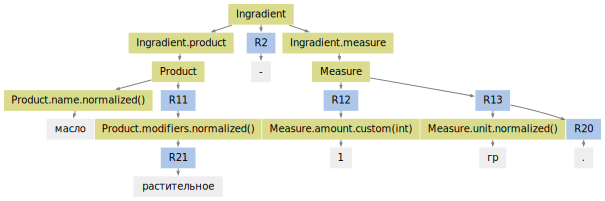

Ingradient(
    measure=Measure(
        amount=1,
        unit='гр'
    ),
    product=Product(
        name='масло',
        modifiers='растительный'
    )
)

__________________________________________________________________________________________


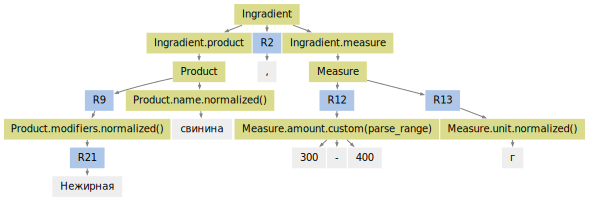

Ingradient(
    measure=Measure(
        amount=(300,
         400),
        unit='г'
    ),
    product=Product(
        name='свинина',
        modifiers='нежирный'
    )
)

__________________________________________________________________________________________


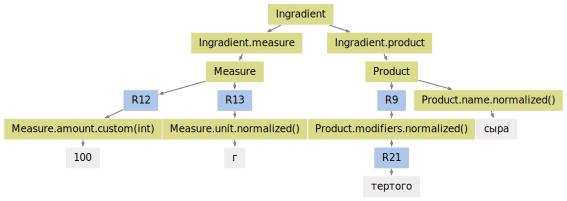

Ingradient(
    measure=Measure(
        amount=100,
        unit='г'
    ),
    product=Product(
        name='сыр',
        modifiers='тёртый'
    )
)

__________________________________________________________________________________________


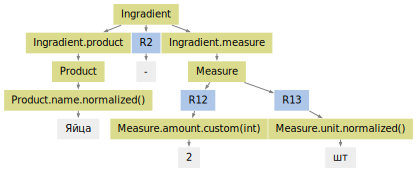

Ingradient(
    measure=Measure(
        amount=2,
        unit='шт'
    ),
    product=Product(
        name='яйцо',
        modifiers=None
    )
)

__________________________________________________________________________________________


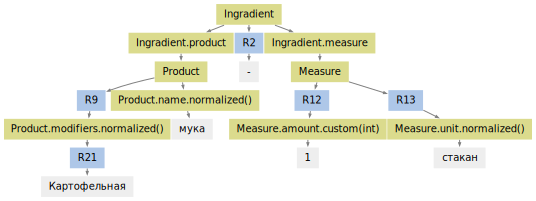

Ingradient(
    measure=Measure(
        amount=1,
        unit='стакан'
    ),
    product=Product(
        name='мука',
        modifiers='картофельный'
    )
)

__________________________________________________________________________________________


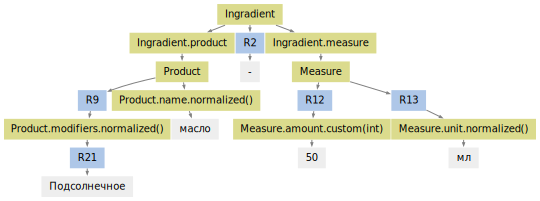

Ingradient(
    measure=Measure(
        amount=50,
        unit='мл'
    ),
    product=Product(
        name='масло',
        modifiers='подсолнечный'
    )
)

__________________________________________________________________________________________


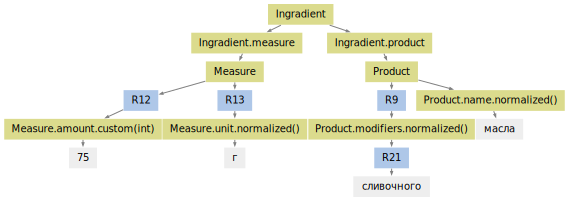

Ingradient(
    measure=Measure(
        amount=75,
        unit='г'
    ),
    product=Product(
        name='масло',
        modifiers='сливочный'
    )
)

__________________________________________________________________________________________


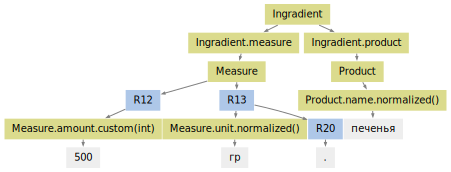

Ingradient(
    measure=Measure(
        amount=500,
        unit='гр'
    ),
    product=Product(
        name='печение',
        modifiers=None
    )
)

__________________________________________________________________________________________


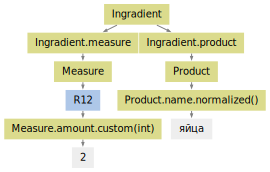

Ingradient(
    measure=Measure(
        amount=2,
        unit=None
    ),
    product=Product(
        name='яйцо',
        modifiers=None
    )
)

__________________________________________________________________________________________


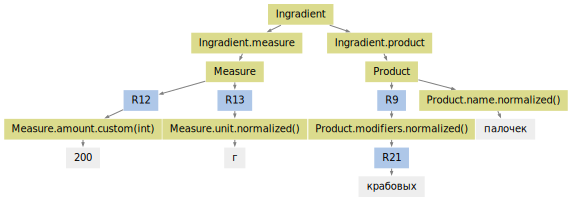

Ingradient(
    measure=Measure(
        amount=200,
        unit='г'
    ),
    product=Product(
        name='палочка',
        modifiers='крабовый'
    )
)

__________________________________________________________________________________________


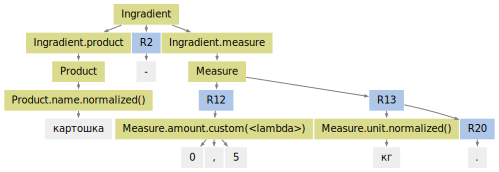

Ingradient(
    measure=Measure(
        amount=0.5,
        unit='кг'
    ),
    product=Product(
        name='картошка',
        modifiers=None
    )
)

__________________________________________________________________________________________


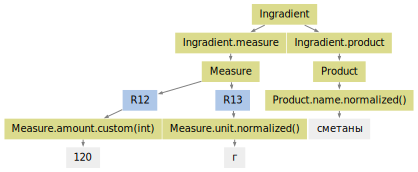

Ingradient(
    measure=Measure(
        amount=120,
        unit='г'
    ),
    product=Product(
        name='сметана',
        modifiers=None
    )
)

__________________________________________________________________________________________


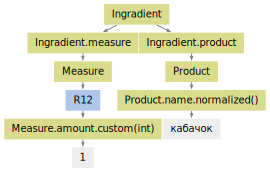

Ingradient(
    measure=Measure(
        amount=1,
        unit=None
    ),
    product=Product(
        name='кабачок',
        modifiers=None
    )
)

__________________________________________________________________________________________


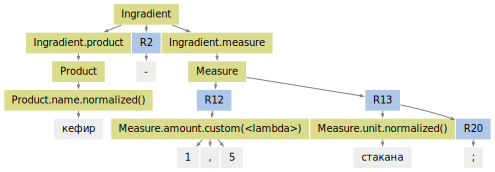

Ingradient(
    measure=Measure(
        amount=1.5,
        unit='стакан'
    ),
    product=Product(
        name='кефир',
        modifiers=None
    )
)

__________________________________________________________________________________________


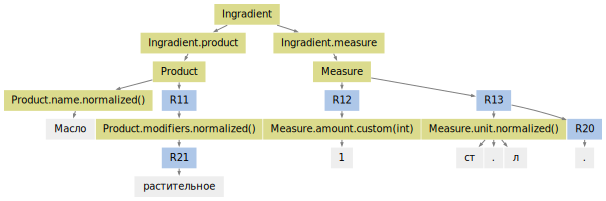

Ingradient(
    measure=Measure(
        amount=1,
        unit='ст.л'
    ),
    product=Product(
        name='масло',
        modifiers='растительный'
    )
)

__________________________________________________________________________________________


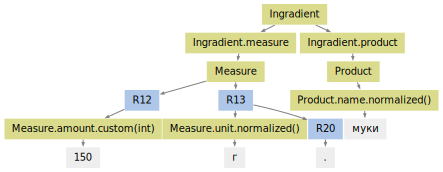

Ingradient(
    measure=Measure(
        amount=150,
        unit='г'
    ),
    product=Product(
        name='мука',
        modifiers=None
    )
)

__________________________________________________________________________________________


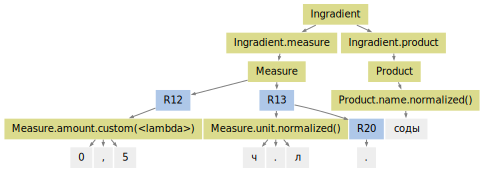

Ingradient(
    measure=Measure(
        amount=0.5,
        unit='ч.л'
    ),
    product=Product(
        name='сода',
        modifiers=None
    )
)

__________________________________________________________________________________________


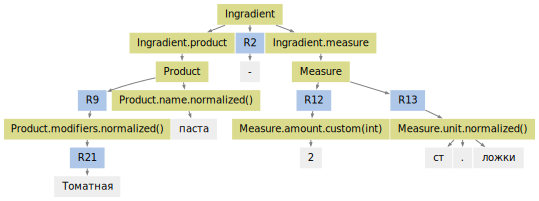

Ingradient(
    measure=Measure(
        amount=2,
        unit='ст.ложка'
    ),
    product=Product(
        name='паста',
        modifiers='томатный'
    )
)

In [7]:
for line in lines:
    matches = list(parser.findall(line))
    spans = [_.span for _ in matches]
    print('_'*90)
    show_markup(line, spans)
    if matches:
        match = matches[0]
        display(match.tree.as_dot)
        display(match.fact)

---

In [ ]:
# предопределённые rules для извлечения имён
# from natasha import NameExtractor

---

In [ ]:
# %run -n main.py

In [ ]:
# !pip install graphviz